In [11]:
dr=[190.0/255.0,30.0/255.0,45.0/255.0]
dy=[255.0/255.0,213.0/255.0,58.0/255.0]
dg=[175.0/255.0,169.0/255.0,97.0/255.0] # Durham green
db=[0,174.0/255.0,239.0/255.0]
dp=[104.0/255.0,36.0/255.0,109.0/255.0]
di=[0.0/255.0,42.0/255.0,65.0/255.0] # Durham ink	
dpi=[203.0/255.0,168.0/255.0,177.0/255.0] #  Durham pink 
ds=[218.0/255.0,205.0/255.0,162.0/255.0] # Durham stone
dsk=[165.0/255.0,200.0/255.0,208.0/255.0] # Durham sky

In [12]:
import numpy as np
import pyvista as pv
from pyvista import examples
from scipy.linalg import kron, eig

In [13]:
def trajectory(gi):
    r=3.0
    G=gi*2.0 #input parameter
    Omega=10.0
    Delta=10.0
    phiL=0.1*np.pi/2
    H=np.array([[Delta/2, (Omega/2)*np.exp(-1.j*phiL)],[(Omega/2)*np.exp(1.j*phiL), -Delta/2] ])
    I2=np.eye(2,2)
    Hrho=kron(H,I2)
    rhoH=kron(I2,np.conj(H))
    L=np.array([[0,0,0,G],[0,-G/2,0,0],[0,0,-G/2,0],[0,0,0,-G] ])
    evals, evecs = eig(-1.j*(Hrho-rhoH)+L)
    evecs=np.mat(evecs)
    rho0=np.zeros((4,1))
    rho0[0]=1.0
    npts=50
    tmax=2*np.pi/np.sqrt(Omega**2+Delta**2)
    t=np.linspace(0,tmax,npts)
    u=np.zeros(npts)
    v=np.zeros(npts)
    w=np.zeros(npts)
    for i in range(0,npts):
        rho=evecs*np.mat(np.diag(np.exp(evals*t[i])))*np.linalg.inv(evecs)*rho0
        u[i]=(rho[1]+rho[2]).real
        v[i]=(1.j*(rho[1]-rho[2])).real
        w[i]=(rho[0]-rho[3]).real
    return r*np.column_stack((u, v, w))

In [14]:
num=50
theta = np.linspace(-1 * np.pi, 1 * np.pi, num)
r=3.0
phi=0*np.pi/60

z = 0*r * np.cos(theta)
x = r * np.cos(theta)
y = r * np.sin(theta)
rpts=np.column_stack((x, y, z))
spline = pv.Spline(rpts, 1000)
rxy_tube=spline.tube(radius=0.05)

z = r * np.cos(theta)
x = r * np.sin(theta)*np.cos(phi-np.pi/2)
y = r * np.sin(theta)*np.sin(phi-np.pi/2)
rpts=np.column_stack((x, y, z))
spline = pv.Spline(rpts, 1000)
rxz_tube=spline.tube(radius=0.05)

z = r * np.cos(theta)
x = r * np.sin(theta)*np.cos(phi)
y = r * np.sin(theta)*np.sin(phi)
rpts=np.column_stack((x, y, z))
spline = pv.Spline(rpts, 1000)
ryz_tube=spline.tube(radius=0.05)

small=pv.Sphere(center=(0, 0, r), radius=0.1)
big=pv.Sphere(center=(0, 0, 0), radius=r)


[ 1.19937937 -1.04666389  2.49081161]


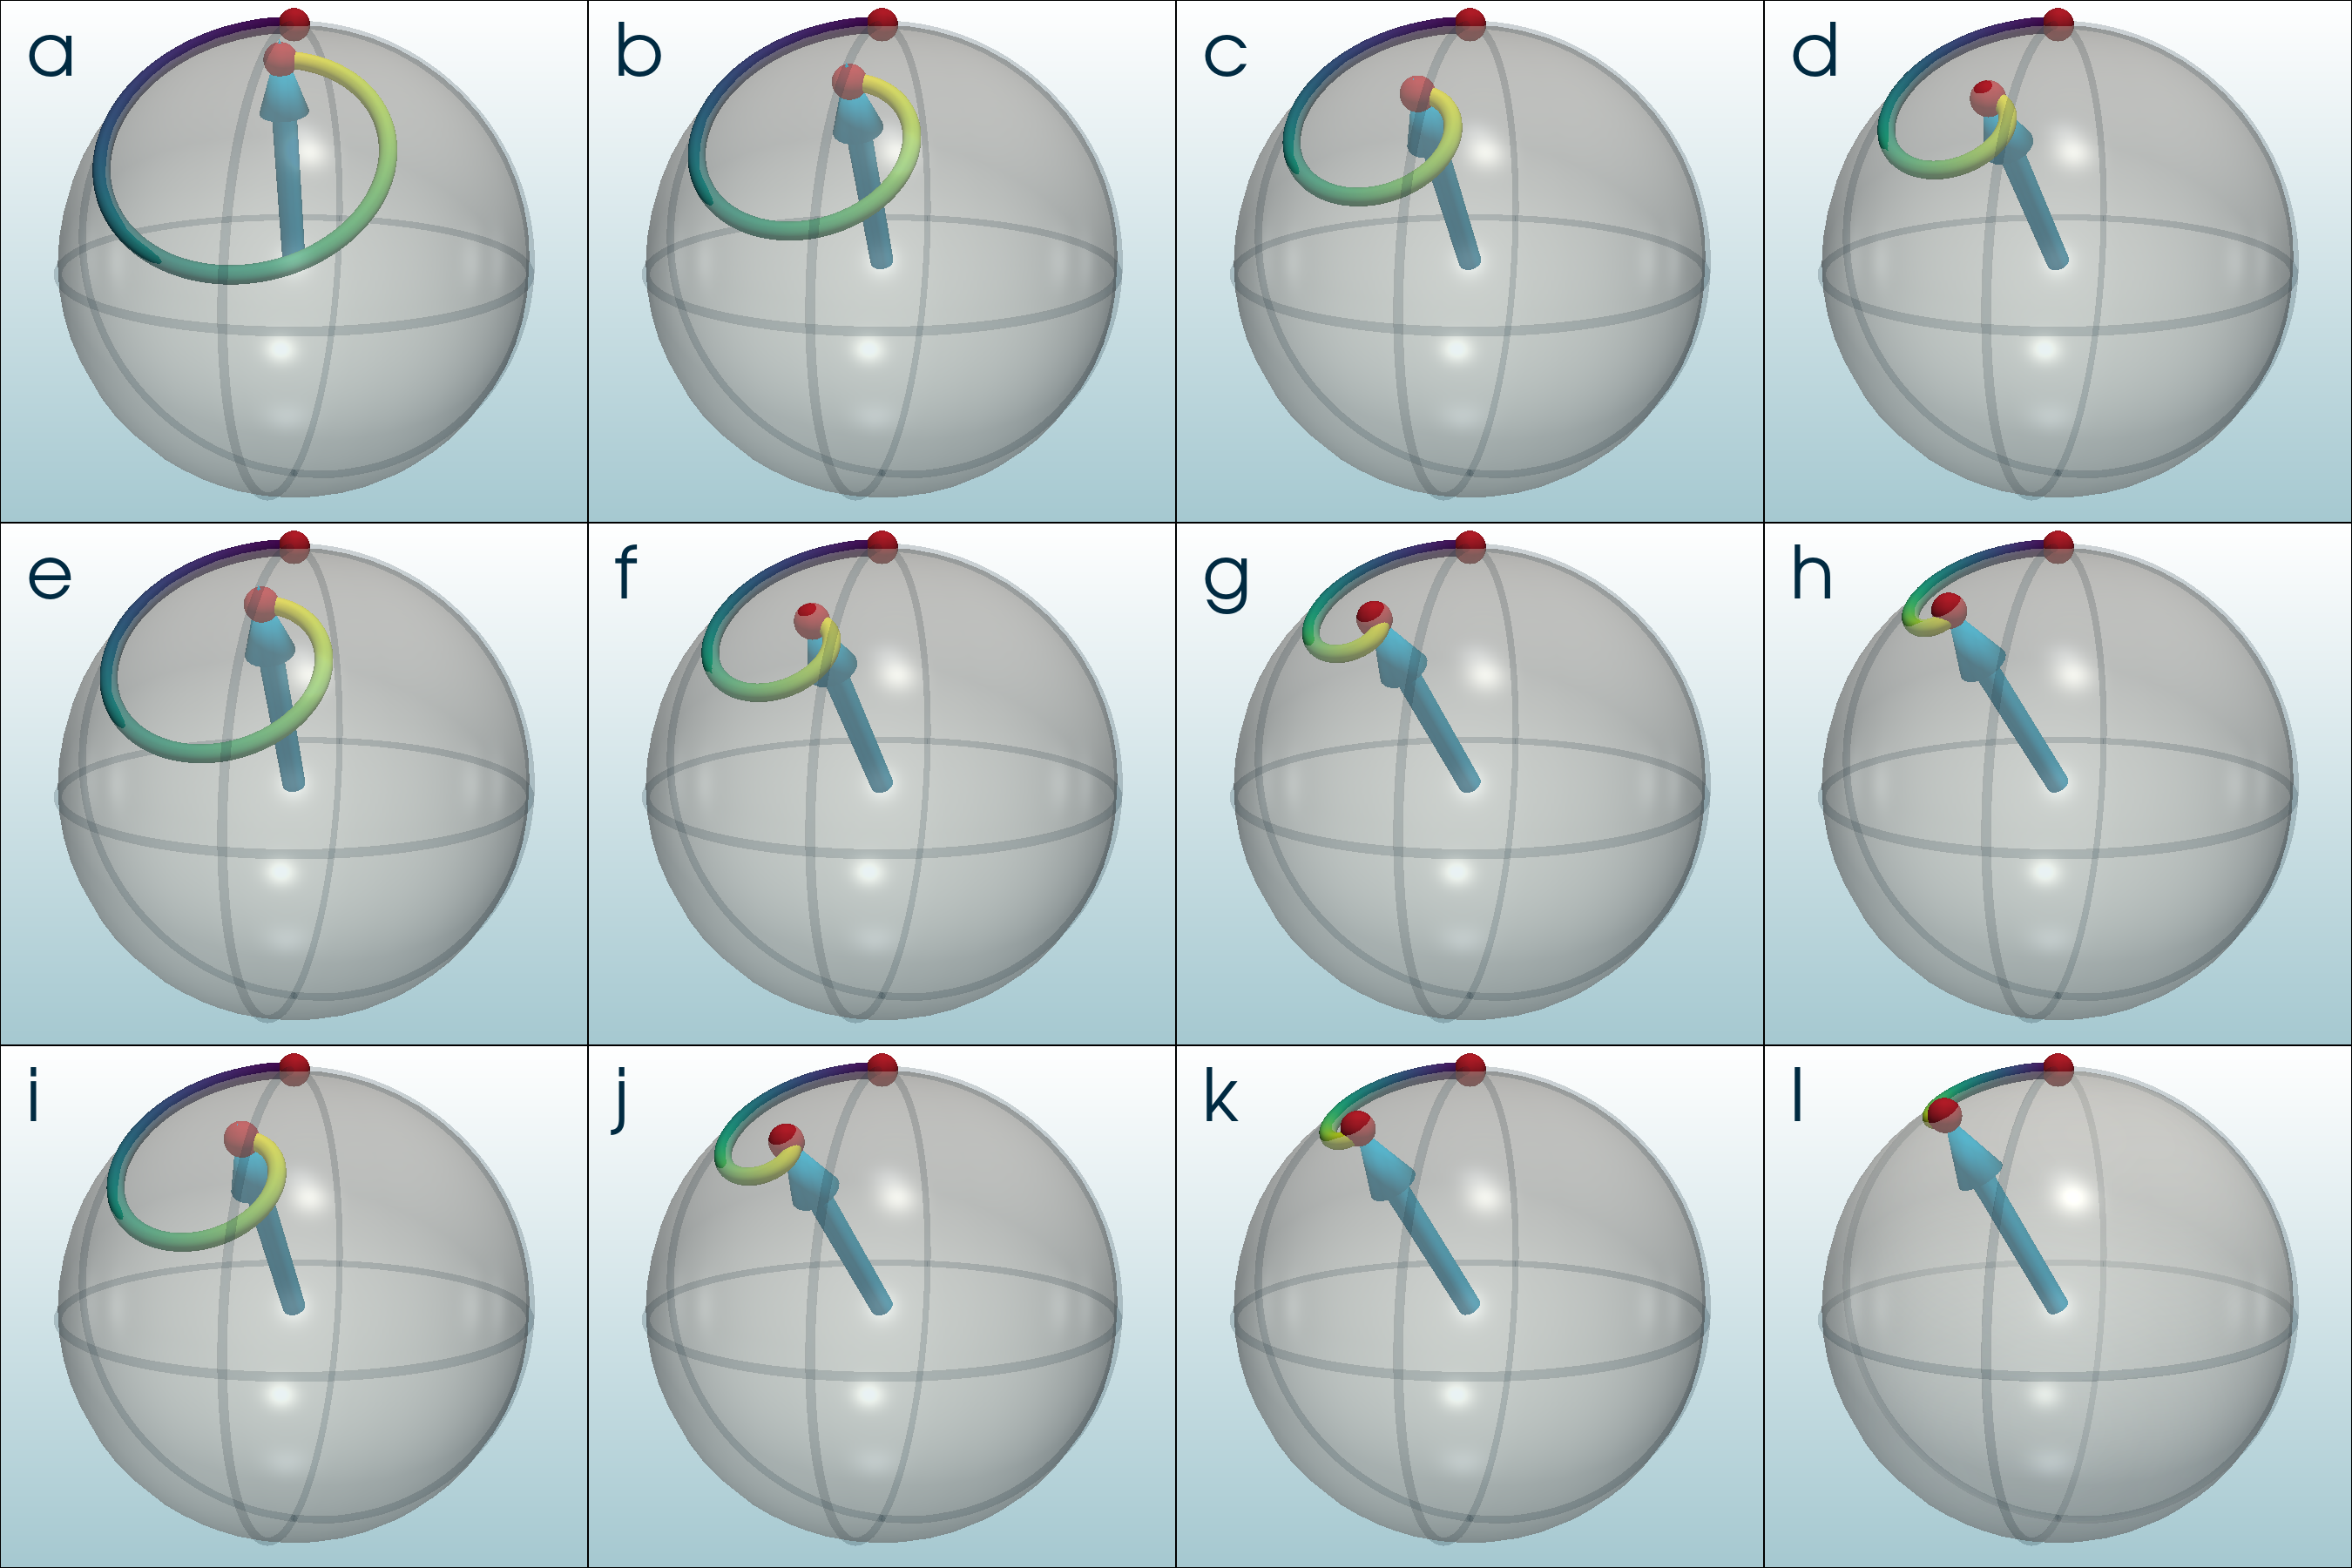

[(12.0, 3.0, 3.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [132]:
from string import ascii_lowercase


small=pv.Sphere(center=(0, 0, r), radius=0.2)
big=pv.Sphere(center=(0, 0, 0), radius=r)
sargs = dict(height=0.25, vertical=True, position_x=0.05, position_y=0.05)


nx=4
ny=3

res=3

p = pv.Plotter(shape=(ny,nx), multi_samples=1, window_size=(res*900,res*600))
p.set_background(dsk, top="white")

'''UFO = pv.Light(position=(10, 10, 10), focal_point=(0, 0, 0), color='white')
UFO.positional = True
UFO.cone_angle = 40
UFO.exponent = 1
UFO.intensity = 0.5
UFO.show_actor()
p.add_light(UFO)
'''

for i in range(0,ny):
    for j in range(0,nx):
        p.subplot(i,j)
        p.add_mesh(small, opacity=1.0, color=dr, smooth_shading=True)
        p.add_mesh(big, opacity=0.4, color="w", specular=0.85, smooth_shading=True)
#        p.add_mesh(tube,smooth_shading=True,color=dpi)
#        p.add_mesh(tube,smooth_shading=True,scalar_bar_args=sargs)
        
        ij=(i+1)*(j+1)
        label=ascii_lowercase[(4*i+j)]
#        p.add_text('$\\vert \\psi\\rangle$',[180.0*res,165.0*res],color=di,font_size=res*14)
        p.add_text(label,[10.0*res,165.0*res],color=di,font_size=res*14)
        p.add_mesh(rxy_tube,opacity=0.1,smooth_shading=True,color=di)
        p.add_mesh(rxz_tube,opacity=0.1,smooth_shading=True,color=di)
        p.add_mesh(ryz_tube,opacity=0.1,smooth_shading=True,color=di)
        
        
        points=trajectory(ij)
        spline = pv.Spline(points, 1000)
        spline["scalars"] = np.arange(spline.n_points)
        tubes=spline.tube(radius=0.1)
        p.add_mesh(tubes,smooth_shading=True,show_scalar_bar=False)
        ept=pv.Sphere(center=(points[num-1,:]), radius=0.2)
        p.add_mesh(ept, opacity=1.0, color=dr, smooth_shading=True)
        arrow=pv.Arrow(start=(0.0, 0.0, 0.0), direction=(r*points[num-1,:]), tip_length=0.3, tip_radius=0.1, tip_resolution=20, shaft_radius=0.05, shaft_resolution=20, scale=r)
        p.add_mesh(arrow, opacity=1.0, color=db, smooth_shading=True)


print(points[num-1,:])
        
p.enable_depth_peeling(10)
p.link_views()
rr = 12
thetaa = 0.1*np.pi
xx = rr*np.cos(thetaa)
yy = rr*np.sin(thetaa)
p.camera_position = [(12, 3.0, 3.0),
                     (0.0, 0.0, 0.0),
                     (0.0, 0.0, 0.1)]

# tuple: camera location, focus point, viewup vector
#p.camera_position = [(x,y,z), (fx,fy,fz,), (nx,ny,nz)]

#p.show(screenshot='bloch_spheres.png')
p.show()


In [102]:
np.cos()

-1.0

In [34]:
def make_points():
    num=50
    """Helper to make XYZ points"""
    theta = np.linspace(-8 * np.pi, 8 * np.pi, num)
    r=3.0
    z = np.linspace(-r, r, num)
    r = np.sqrt(r**2-z**2)
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return np.column_stack((x, y, z))

points = make_points()

In [35]:
spline = pv.Spline(points, 1000)
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=0.05)

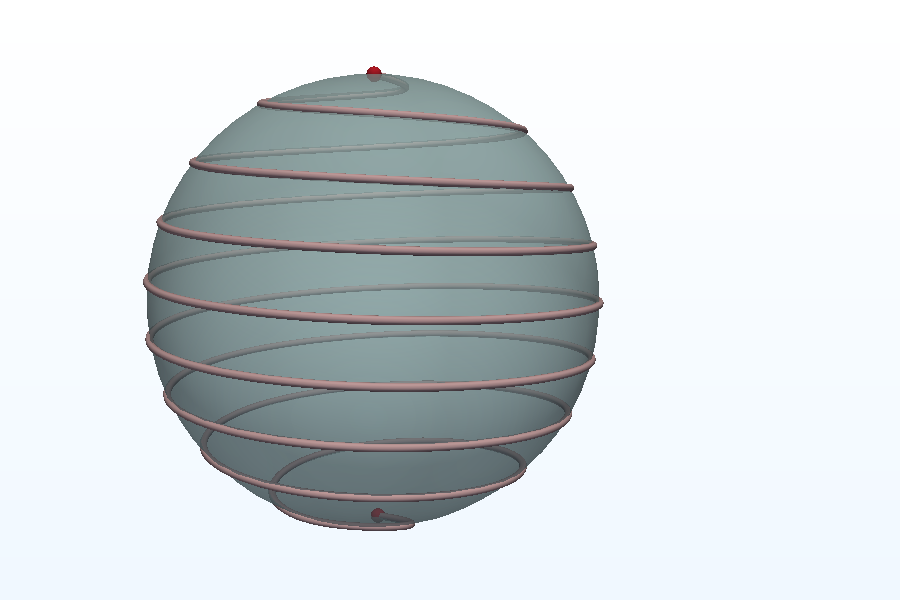

[(15.0, 0.0, 2.0),
 (0.0, 1.0, 0.0),
 (0.0, 0.0, 1.0)]

In [38]:
p = pv.Plotter(shape=(1,1), multi_samples=1, window_size=(900,600))

p.set_background("aliceblue", top="white")

r=3.0

big=pv.Sphere(center=(0, 0, 0), radius=r)
p.add_mesh(big, opacity=0.65, color=dsk, smooth_shading=True)


p.add_mesh(tube,smooth_shading=True,show_scalar_bar=True,color=dpi)

small=pv.Sphere(center=(0, 0, r), radius=0.1)
p.add_mesh(small, opacity=1.0, color=dr, smooth_shading=True)
small=pv.Sphere(center=(0, 0, -r), radius=0.1)
p.add_mesh(small, opacity=1.0, color=dr, smooth_shading=True)


p.enable_depth_peeling(10)
p.link_views()
p.camera_position = [(15, 0.0, 2.0),
                     (0.0, 1.0, 0.0),
                     (0.0, 0.0, 0.33)]

#p.show(screenshot='pyvista_bloch_spline.png')
p.show()

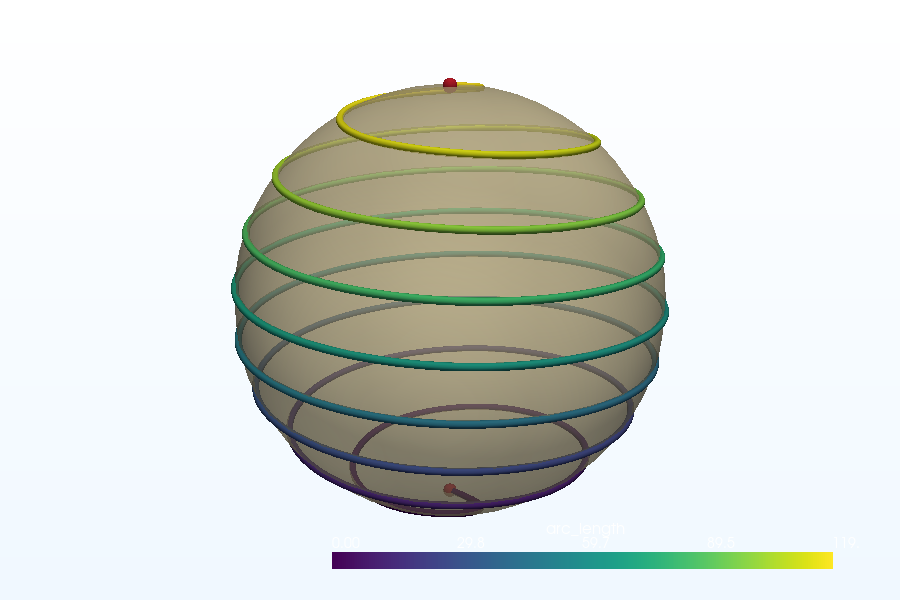

[(15.0, 0.0, 5.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [30]:
spline = pv.Spline(points, 1000)
spline["scalars"] = np.arange(spline.n_points)
tube = spline.tube(radius=0.05)

p = pv.Plotter(shape=(1,1), multi_samples=1, window_size=(900,600))

p.set_background("aliceblue", top="white")

r=3.0

big=pv.Sphere(center=(0, 0, 0), radius=r)
p.add_mesh(big, opacity=0.65, color=ds, smooth_shading=True)


p.add_mesh(tube,smooth_shading=True)

small=pv.Sphere(center=(0, 0, r), radius=0.1)
p.add_mesh(small, opacity=1.0, color=dr, smooth_shading=True)
small=pv.Sphere(center=(0, 0, -r), radius=0.1)
p.add_mesh(small, opacity=1.0, color=dr, smooth_shading=True)


p.enable_depth_peeling(10)
p.link_views()
p.camera_position = [(15, 0.0, 5.0),
                     (0.0, 0.0, 0.0),
                     (0.0, 0.0, 0.33)]

#p.show(screenshot='pyvista_bloch_spline.png')
p.show()

In [5]:
aa = np.array([[1,2],[3,4]])

In [6]:
aa

array([[1, 2],
       [3, 4]])

In [43]:
aa

matrix([[1, 2],
        [3, 4]])

In [21]:
a = np.array([1,2])

In [45]:
a.dot(aa)

matrix([[ 7, 10]])

In [26]:
b = np.array([1,2])

In [27]:
c = np.array([3,4])

In [28]:
b*c

array([3, 8])

In [38]:
bb = np.array([[1,2],[3,3]])

In [44]:
bb

array([[1, 2],
       [3, 3]])

In [41]:
aa*bb

matrix([[ 7,  8],
        [15, 18]])

In [32]:
aa.dot(bb)

array([[ 7,  8],
       [15, 18]])

In [33]:
aa = np.mat(aa)

In [34]:
bb = np.mat(bb)

In [40]:
aa*bb

matrix([[ 7,  8],
        [15, 18]])

In [50]:
(1+2j).imag

2.0